# California Housing Analysis

#### Disclaimer: This is from 1990 Census Data

## My friend named Dave is interested in moving to California! As his friend, I'd love to show him some data to give better insight on the real estate there.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy import stats

### Dave: Wait, what is this stuff?

### Me: Just some stuff to help look at the data a bit easier. It'll be important later. Anyways I found some data from Kaggle about your problem.

In [2]:
raw_data = pd.read_csv('housing.csv')

In [3]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dave: Oh okay. This seems pretty neat! But why are there so many rooms and households?

### Me: This data goes by residential block so it is the total in a collection of houses.

### Dave: Ah gotcha

In [4]:
raw_data.shape

(20640, 10)

### Me: We got a solid 20,000 values, so it should be a good representation of what to look for.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Dave: What is this for?

### Me: This is for me. I want to make sure when doing my analysis I don't mess up things that don't have correct data types.

In [6]:
raw_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Me: See Dave. Not many missing values which is really good. Maybe 1% missing total bedrooms but that should be fine.

### Dave: Nice!

### Me: So what kinda things are you curions about in terms of finding a house?

### Dave: Well....

In [7]:
raw_data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


___

## How are houses in terms of location? Where should I be looking?

In [8]:
raw_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Dave: It looks like most are pretty nearby. That's good. I wonder who lives on an island.

### Me: Yeah. Seems like there should be little problem looking for a place relatively close to the ocean.

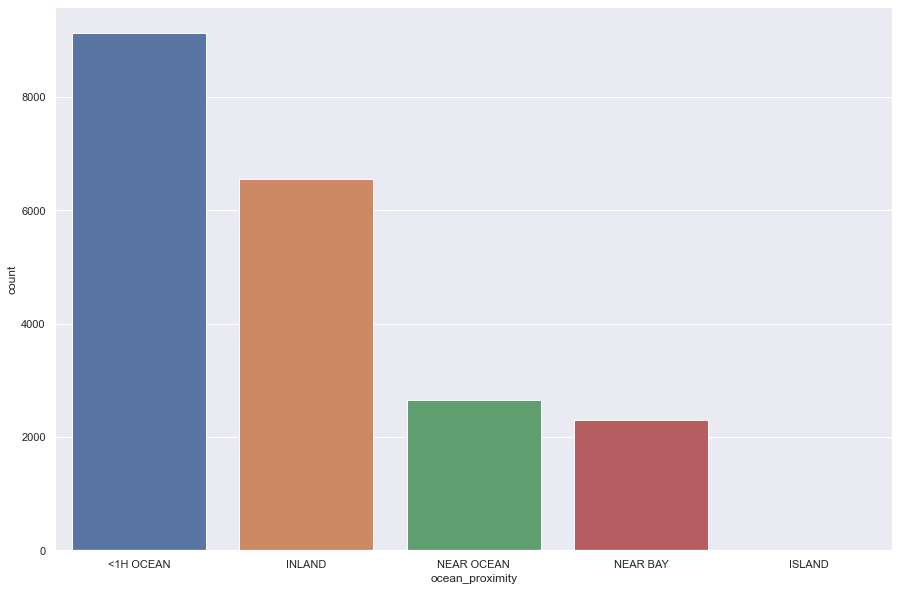

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x='ocean_proximity',data = raw_data,order = raw_data['ocean_proximity'].value_counts().index)

([<matplotlib.patches.Wedge at 0x2bf8cc8ab20>,
 [Text(-1.0821856169913806, 0.1971656419789838, '<1H OCEAN'),
  Text(0.6539909935180138, -0.8844748613710405, 'INLAND'),
  Text(0.9819248880550879, 0.49580592394404016, 'NEAR OCEAN'),
  Text(0.37727080250942474, 1.033279604741086, 'NEAR BAY'),
  Text(0.000837098431145386, 1.0999996814845978, 'ISLAND')],
 [Text(-0.5902830638134803, 0.10754489562490024, '44.3%'),
  Text(0.35672236010073477, -0.4824408334751129, '31.7%'),
  Text(0.5355953934845934, 0.27043959487856734, '12.9%'),
  Text(0.20578407409604985, 0.5636070571315014, '11.1%'),
  Text(0.00045659914426111957, 0.599999826264326, '0.0%')])

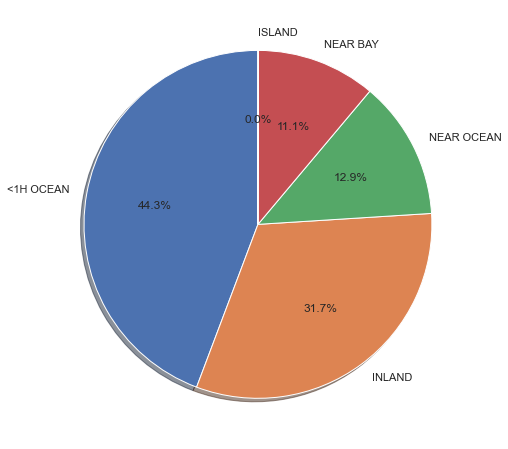

In [10]:
geographic_loc = raw_data['ocean_proximity'].value_counts()
labels = raw_data['ocean_proximity'].value_counts().index
plt.figure(figsize = (10,8))
plt.pie(geographic_loc,labels=labels, autopct = '%1.1f%%',shadow= True, startangle = 90)

### Dave: Alright, so when it comes to options, I'll have lots of choices sort of close to the ocean or more inland like in a suburb. That's good to know.

### Me: It looks that way indeed. If you want variety, those two areas seem to be the best for you.

___

## How are the ages of the houses? Should I be looking for an older house or more recent build?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 52 Text major ticklabel objects>)

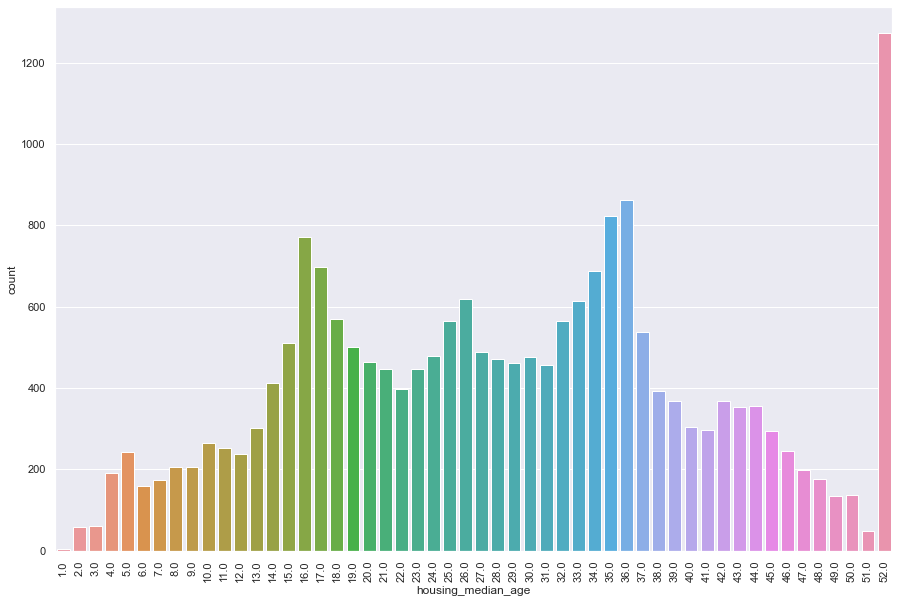

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='housing_median_age',data = raw_data)
plt.xticks(rotation=90)

### Me: I counted up all the house ages here. Looks like most houses are between 16 and 36 years old.

### Dave: Why is there so many houses that are 52 years old? 

### Me: Well, the data counts anything older than 52 years there so it's disproportional to the data at hand.

___

In [12]:
raw_data['housing_median_age'].value_counts().sort_index()

1.0        4
2.0       58
3.0       62
4.0      191
5.0      244
6.0      160
7.0      175
8.0      206
9.0      205
10.0     264
11.0     254
12.0     238
13.0     302
14.0     412
15.0     512
16.0     771
17.0     698
18.0     570
19.0     502
20.0     465
21.0     446
22.0     399
23.0     448
24.0     478
25.0     566
26.0     619
27.0     488
28.0     471
29.0     461
30.0     476
31.0     458
32.0     565
33.0     615
34.0     689
35.0     824
36.0     862
37.0     537
38.0     394
39.0     369
40.0     304
41.0     296
42.0     368
43.0     353
44.0     356
45.0     294
46.0     245
47.0     198
48.0     177
49.0     134
50.0     136
51.0      48
52.0    1273
Name: housing_median_age, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 <a list of 52 Text major ticklabel objects>)

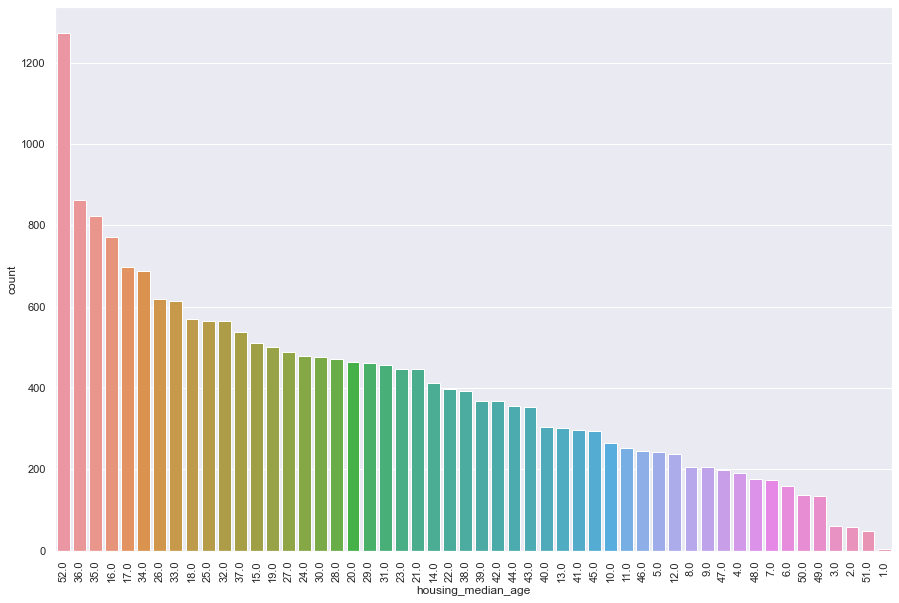

In [13]:
plt.figure(figsize=(15,10))
sns.countplot(x='housing_median_age',data = raw_data,order = raw_data['housing_median_age'].value_counts().index )
plt.xticks(rotation=90)

### Me: Here I just sorted it by count. No difference otherwise.

In [14]:
out = pd.cut(raw_data['housing_median_age'], bins =[0,10,20,30,40,50,60], include_lowest = True)
out

0        (40.0, 50.0]
1        (20.0, 30.0]
2        (50.0, 60.0]
3        (50.0, 60.0]
4        (50.0, 60.0]
             ...     
20635    (20.0, 30.0]
20636    (10.0, 20.0]
20637    (10.0, 20.0]
20638    (10.0, 20.0]
20639    (10.0, 20.0]
Name: housing_median_age, Length: 20640, dtype: category
Categories (6, interval[float64]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0]]

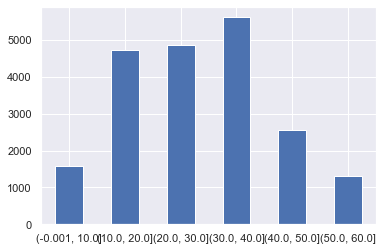

In [15]:
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

In [16]:
out.value_counts(sort=False)

(-0.001, 10.0]    1569
(10.0, 20.0]      4724
(20.0, 30.0]      4852
(30.0, 40.0]      5617
(40.0, 50.0]      2557
(50.0, 60.0]      1321
Name: housing_median_age, dtype: int64

### Me: Now it's all organized by a 10 year interval. See how 50 year and older houses are actually the lowest in terms of quantity.

### Dave: Hmm, so I should look at something a bit older from the 10-40 year old range. Nothing too new.

### Me: For the best possible variety of houses, that should be the case.

___

## What about house value? What can I afford?

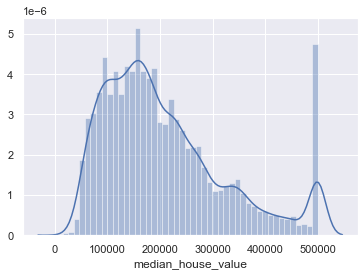

In [17]:
sns.distplot(raw_data['median_house_value'])

In [18]:
q = raw_data['median_house_value'].quantile(0.99)
data_no_outlier = raw_data[raw_data['median_house_value'] < q]

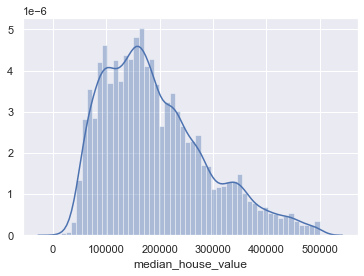

In [19]:
sns.distplot(data_no_outlier['median_house_value'])

In [20]:
raw_data['median_house_value'].value_counts().sort_index()

14999.0       4
17500.0       1
22500.0       4
25000.0       1
26600.0       1
           ... 
498800.0      1
499000.0      1
499100.0      1
500000.0     27
500001.0    965
Name: median_house_value, Length: 3842, dtype: int64

### Me: From this, essentially most houses will range between \\$100,000 to \\$250,000. 

### Dave: How about income? What kind of income to afford living in these sort of priced houses?

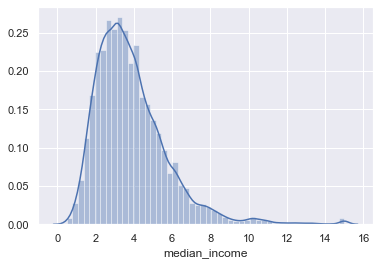

In [21]:
sns.distplot(raw_data['median_income'])

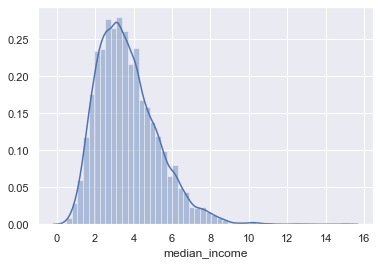

In [22]:
sns.distplot(data_no_outlier['median_income'])

### Me: From the data, people earn from \\$30,000 to \\$50,000. Keep in mind of couple households so perhaps earn around \\$60,000 to $100,000  per family

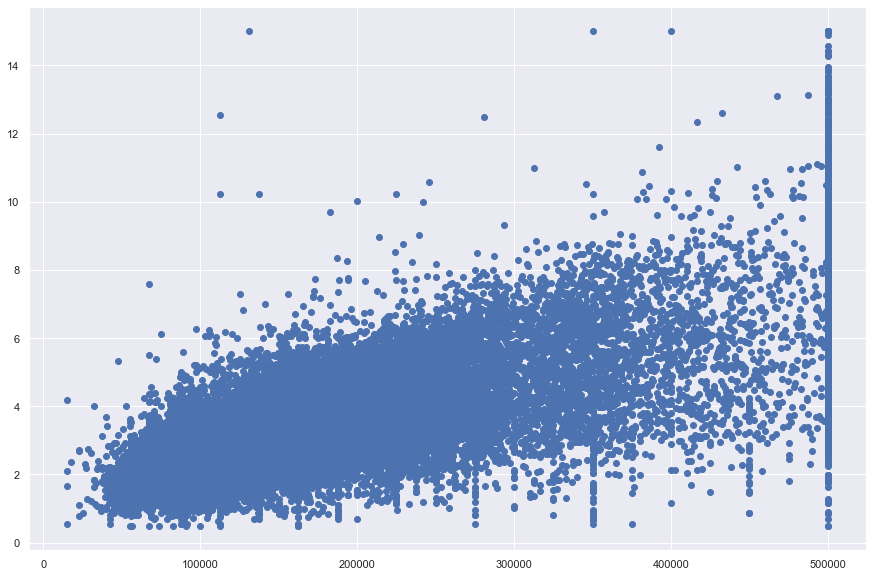

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(raw_data['median_house_value'],raw_data['median_income'])

### Me: So here,you can see how your income affects what your house value is. Say you earn \\$80,000. Anything around \\$400,000 or lower is your expected house value.


## How large are family households?

In [24]:
estimated_household = pd.DataFrame({'family':np.ceil(raw_data['population']/raw_data['households'])})
estimated_household

,family
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
20635,3.0
20636,4.0
20637,3.0
20638,3.0


In [25]:
estimated_household['family'].value_counts()

3.0       11001
4.0        6247
2.0        1648
5.0        1396
6.0         231
7.0          44
8.0          17
10.0          9
13.0          9
9.0           7
14.0          4
11.0          3
19.0          3
1.0           3
12.0          2
17.0          2
16.0          2
64.0          1
231.0         1
34.0          1
84.0          1
22.0          1
1244.0        1
503.0         1
18.0          1
20.0          1
42.0          1
600.0         1
52.0          1
Name: family, dtype: int64

### Me: Most families are 2-4 members large.

([<matplotlib.patches.Wedge at 0x2bf8e879910>,
 [Text(-0.1449082231318923, 1.090413502699209, '3.0'),
  Text(-0.36636471053731945, -1.037196653905568, '4.0'),
  Text(0.8496123715078543, -0.6986836323979544, '2.0'),
  Text(1.0741967328656377, -0.23685729691269858, '5.0'),
  Text(1.0999998814367746, -0.00051072407593117, '1.0')],
 [Text(-0.07904084898103216, 0.5947710014722958, '54.2%'),
  Text(-0.1998352966567197, -0.5657436294030369, '30.8%'),
  Text(0.463424929913375, -0.3811001631261569, '8.1%'),
  Text(0.585925490653984, -0.1291948892251083, '6.9%'),
  Text(0.5999999353291497, -0.00027857676868972905, '0.0%')])

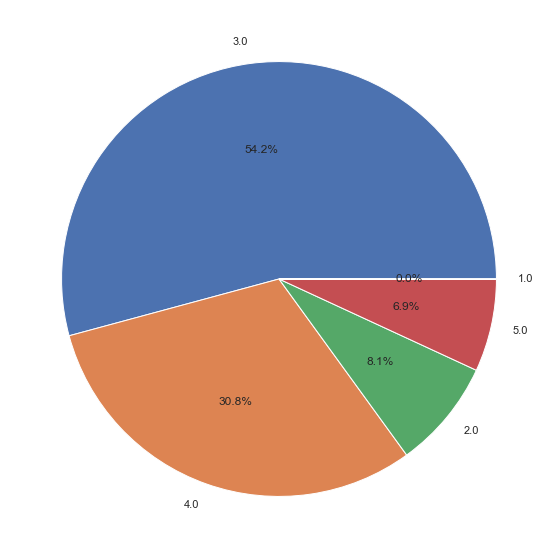

In [26]:
q = estimated_household['family'].quantile(0.99)
estimated_household2 = estimated_household[estimated_household['family'] < q]
plt.figure(figsize=(15,10))
plt.pie(estimated_household2['family'].value_counts(),labels = estimated_household2['family'].value_counts().index,autopct = '%1.1f%%' )


### Me: So if you are looking for households in California. See that you are earning a considerable amount around \\$80,000 so that you can afford good housing. Find something either about an hour from the ocean or inland. Also, the age of the house should be around 10-40 years old for decent number of available houses. Lastly, you are moving with a small family such as just a partner and kids you are golden in terms of affordability and variety.

### Dave: Thank you! I'll look into it!
